In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from TrackReconstruction_functions import *
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 
import plotly.express as px
import plotly.io as pio

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
nubb = pd.read_hdf("../data/Trackreco/ATPC_0nubb_15bar_nodiff_reco.h5", "data")
nubb_meta = pd.read_hdf("../data/Trackreco/ATPC_0nubb_15bar_nodiff_reco.h5", "meta")
display(nubb)
display(nubb_meta)

# Load the dictionary back from the pickle file (binary mode)
with open("../data/Trackreco/ATPC_0nubb_15bar_nodiff_trackreco.pkl", 'rb') as pickle_file:  # Use 'rb' for reading in binary
    Tracks_nubb      = pickle.load(pickle_file)
    connections_nubb = pickle.load(pickle_file)
    connection_counts_nubb = pickle.load(pickle_file)

,event_id,x,y,z,energy,id,primary,trkID,cumulative_distance,angle,Tortuosity
0,125,-1113.410278,799.053253,101.885139,0.512790,1,1,0,0.000000,0.000000,1.986437
1,125,-1101.319580,798.466858,97.870087,0.423386,0,1,0,12.753411,89.120087,1.986437
2,125,-1106.610311,823.529785,92.723630,0.878094,2,1,0,38.880565,100.024576,1.986437
3,125,-1122.699738,823.976196,99.280420,0.470233,3,1,0,56.260451,82.079976,1.986437
4,125,-1121.970947,834.375671,88.380997,0.055701,4,1,0,71.342813,107.436911,1.986437
...,...,...,...,...,...,...,...,...,...,...,...
2,1308,233.302811,-986.250549,1201.408447,0.216008,1,1,0,26.458716,101.238420,1.279510
3,1308,227.195816,-979.015656,1184.974792,0.669451,3,1,0,45.424582,52.794053,1.279510
0,1309,-1080.422607,878.889038,2157.479980,0.534291,1,1,0,0.000000,0.000000,1.488851
1,1309,-1064.413391,873.126923,2157.139893,0.375646,0,1,0,17.018009,138.822912,1.488851


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,Tortuosity1,Tortuosity2,label
0,125,0,1,1,5,83.814,2.461450,0.936175,0.647181,1.986437,1.986437,Primary
0,126,0,1,0,3,50.443,2.454208,1.972394,1.712242,1.034062,1.034062,Primary
0,127,0,1,1,4,94.574,2.458498,1.392222,0.562538,1.563919,1.563919,Primary
0,128,0,1,5,6,172.780,2.459738,1.034110,0.174542,1.636690,3.299561,Primary
0,129,0,1,0,1,14.534,2.458870,2.458870,2.458870,1.000000,1.000000,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...
0,1306,0,1,1,4,148.625,2.418298,0.912442,0.027106,1.933855,1.494243,Primary
0,1306,1,0,0,0,0.000,0.034373,0.034373,0.034373,1.000000,1.000000,Brem
0,1307,0,1,1,3,58.615,2.455795,1.279010,1.176785,1.865735,1.865735,Primary
0,1308,0,1,0,3,45.425,2.460309,1.894918,1.790858,1.279510,1.279510,Primary


{0: [1, 2], 1: [0, 6], 2: [3, 0], 3: [2, 4], 4: [5, 3], 5: [4], 6: [1]}


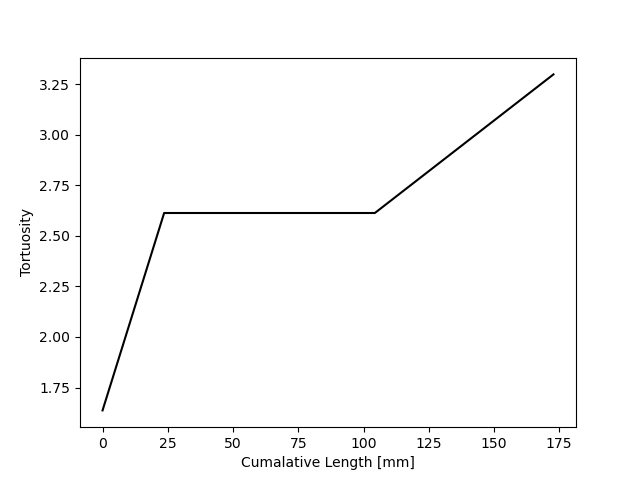

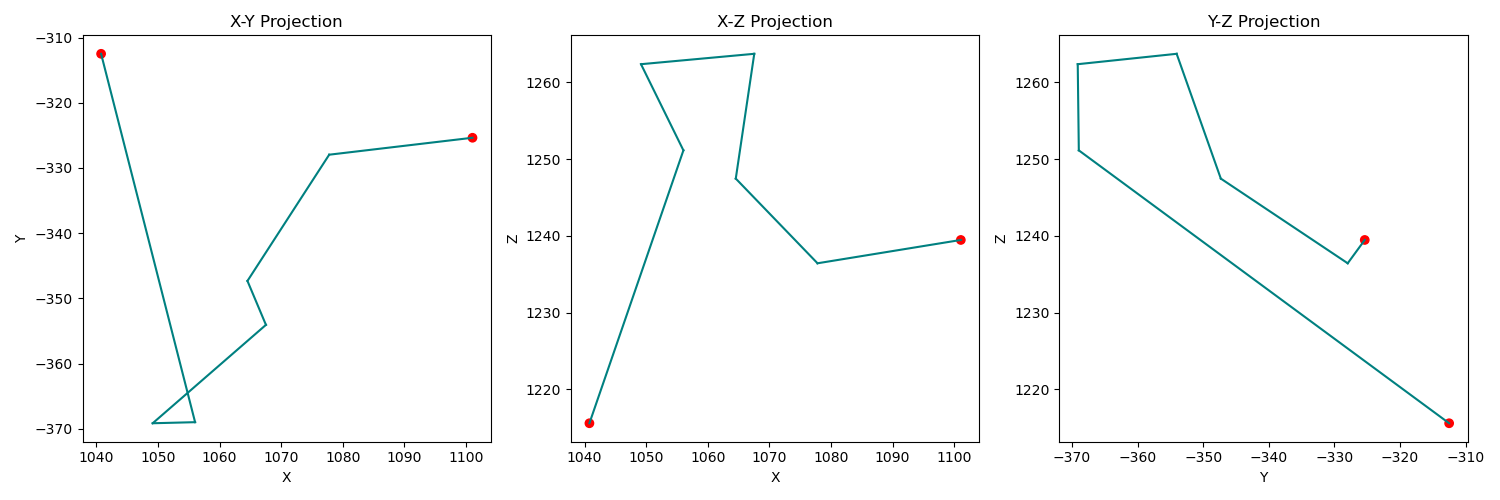

In [6]:
%matplotlib widget


nubb_events = nubb.event_id.unique()

# evid = 26984036
evid= nubb_events[3]

event = nubb[nubb.event_id == evid]
event.index = event.id
Track = Tracks_nubb[evid]
connection = connections_nubb[evid]
connection_count = connection_counts_nubb[evid]

print(connection)

plt.figure()

# plt.hist2d(event.cumulative_distance, event.angle, bins = 20,cmin=3);
plt.plot(event[event.primary == 1].cumulative_distance, event[event.primary == 1].Tortuosity, color="k");

plt.xlabel("Cumalative Length [mm]")
plt.ylabel("Tortuosity")

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot xy projection
plot_tracks(axs[0], event['x'], event['y'], connection_count, 'X', 'Y', Track)

# Plot xz projection
plot_tracks(axs[1], event['x'], event['z'], connection_count, 'X', 'Z', Track)

# Plot yz projection
plot_tracks(axs[2], event['y'], event['z'], connection_count, 'Y', 'Z', Track)

plt.tight_layout()